# Hypothesis testing exercises

## Overview

- For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

#### 1. Has the network latency gone up since we switched internet service providers?

- Null hypothesis: The network latency has not gone up since we switched internet service providers or has decreased

- Alternate hypthesis: The network latency has gone up since we switched internet service providers

- True positive: I test and verify that indeed the network latency has gone up

- True negative: I test and verify that indeed the network latency has not gone up

- Type I error: I stipulate that the network latency has gone up and find out that is has not gone up

- Type II error: I stipulate that the network latency has not gone up when in fact it has gone up

#### 2. Is the website redesign any good?

- Null hypothese: The website redesign is still the same
- Alternate hypthesis: The website redesign is better than before
- True positive: I test and verify that the website redesign is still the same
- True negative: I test and verify that indeed the website redesign is better
- Type I error: I stipulate that the website redesign is better than before when in fact it is not
- Type II error: I stipulate that the website redesign is the same but it is better than before

#### 3. Is our television ad driving more sales?

- Null hypothese: Our television ad is not driving more sales
- Alternate hypthesis: Our television ad is driving more sales
- True positive: I test and verify that our television ad is not driving more sales
- True negative: I test and verify that our television ad is driving more sales
- Type I error: I stipulate that our television ad is driving more sales when in fact it is not
- Type II error: I stipulate that our television ad is not driving more sales but it does

## T-Test

In [3]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

from math import sqrt
from pydataset import data

#### 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

- Null Hypothesis H0 ====> μa==μb ====> The average time to sell homes is the same for its two offices

- Alternative Hypothesis (2-tail, significantly different)	Ha ====> μa!=μb The average time to sell homes is different for its two offices

#### Assumptions verifcation

- Independent Samples. No observations in office A exist in office B.

- Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT). YES! Plenty of observations

- Equal Variances (the scipy methods we will use has an argument to handle when variances aren't equal).

In [3]:
alpha = .05

In [4]:
t, p = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var=False)
t, p
# Null hypthesis rejected because p < alpha
# The average time to sell homes is different for its two offices

(-2.7091418459143854, 0.00811206270346016)

#### 2. Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

##### a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

- Null Hypothesis H0 ====> μa==μb ====> There is no difference in fuel-efficiency in cars from 2008 vs 1999

- Alternative Hypothesis (2-tail, significantly different) Ha ====> μa!=μb There is a difference in fuel-efficiency in cars from 2008 vs 1999

    ##### Assumptions verification

- Independent Samples. No observations in year 1999 exist in year 2008

- At least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear.

- Close Variances

In [7]:
from pydataset import data
mpg = data('mpg')

In [8]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [9]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [12]:
mpg['fuel_efcy'] = stats.hmean(mpg[['cty', 'hwy']], axis=1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efcy
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [14]:
fe_2008 = mpg[mpg.year == 2008].fuel_efcy
fe_1999 = mpg[mpg.year == 1999].fuel_efcy

<AxesSubplot:>

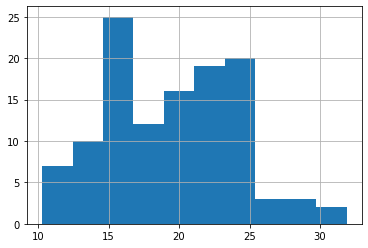

In [18]:
fe_2008.hist()

<AxesSubplot:>

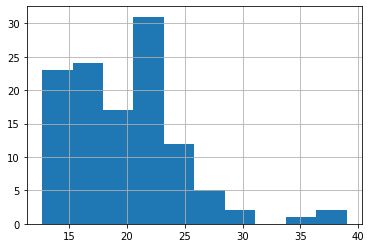

In [19]:
fe_1999.hist()

In [38]:
alpha = .05

In [39]:
print(y1_sample.var())
print(y2_sample.var())

27.122605363984682
24.097480106100797


In [23]:
# Verifying the variances
fe_2008.var(), fe_1999.var()

(22.550836772260343, 25.850396545865912)

In [40]:
t, p = stats.ttest_ind(y1_sample, y2_sample, equal_var=False)
t, p

(0.21960177245940962, 0.8263750772060638)

In [20]:
t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [21]:
p > alpha

True

In [ ]:
# I cannot reject the null hypothesis therefore there is no difference in fuel-efficiency in cars from 2008 vs 1999

##### b. Are compact cars more fuel-efficient than the average car?

- Null Hypothesis H0 ====> μa==μb ====> Compact cars are not more fuel-efficient than the average car

- Alternative Hypothesis (2-tail, significantly different) Ha ====> μa!=μb Compact cars are more fuel-efficient than the average car

#### Assumptions verification
Independent Samples. No observations in year 1999 exist in year 2008

At least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear.

Unequal Variances

In [36]:
alpha = 0.5

In [37]:
fe_compact = mpg[mpg['class'] == 'compact'].fuel_efcy
fe_compact.head()

1    22.212766
2    24.360000
3    24.313725
4    24.705882
5    19.809524
Name: fuel_efcy, dtype: float64

In [54]:
compact_pop_avg = fe_compact.mean()
compact_pop_avg

23.500416808701296

<AxesSubplot:>

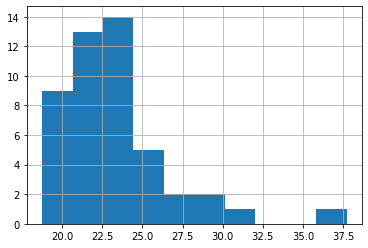

In [39]:
fe_compact.hist()

In [56]:
t, p = stats.ttest_1samp(fe_compact, compact_pop_avg)
t, p

(6.817370168225931e-15, 0.9999999999999947)

In [42]:
p/2 < alpha

True

In [ ]:
# I can reject the null hypothesis
# Compact cars do have a better fuel efficiency than normal cars

#### c.  Do manual cars get better gas mileage than automatic cars?

In [43]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efcy
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [50]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [58]:
mpg["trans"] = np.where(mpg['trans'].str.contains('auto'), 'auto', 'manual')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efcy
1,audi,a4,1.8,1999,4,auto,f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual,f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual,f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto,f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto,f,16,26,p,compact,19.809524


In [60]:
mpg.trans.value_counts()

auto      157
manual     77
Name: trans, dtype: int64

In [62]:
fe_auto = mpg[(mpg.trans == 'auto')].fuel_efcy
fe_manual = mpg[(mpg.trans == 'manual')].fuel_efcy

<AxesSubplot:>

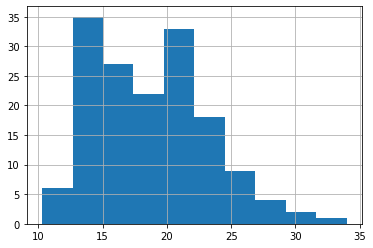

In [63]:
fe_auto.hist()

<AxesSubplot:>

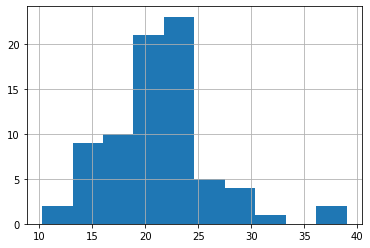

In [64]:
fe_manual.hist()

In [65]:
fe_auto.var(), fe_manual.var()

(20.428279095002054, 25.665633639828275)

In [66]:
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var=True)
t, p/2

(4.652577547151351, 2.7552323050220026e-06)

In [77]:
p/2 < alpha

True

In [78]:
# I can reject the null hypothesis
# Compact cars do have a better fuel efficiency than normal cars

## Correlation exercises

### 1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [9]:
import os
for f in os.listdir("/Users/arsen/codeup-data-science/statistics_exercises"):
    print(f)

draft_file.ipynb
hypothesis_testing.ipynb
.DS_Store
env.py
Arsene BOUNDAONE - jemison_spreadsheet_exercises - Copy of Table1_CustDetails copy.csv
__pycache__
Copy of Arsene BOUNDAONE - jemison_spreadsheet_exercises - Copy of Table1_CustDetails.csv
.gitignore
.ipynb_checkpoints
.git
probability_distributions.ipynb
simulation.ipynb


In [157]:
telco = pd.read_csv('Copy of Arsene BOUNDAONE - jemison_spreadsheet_exercises - Copy of Table1_CustDetails.csv')
telco.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internet,partner_dependents,monthly_charges2,validate,phone_service_type,internet_service_type,contract_type.1,rounded_tenure,service_type
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,...,True,True,3,65.6,TRUE,One Line,DSL,1 Year,9.0,Internet+Phone
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,...,True,True,0,59.9,TRUE,Two or More Lines,Fiber Optic,Month-to-Month,9.0,Internet+Phone
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,...,True,True,0,73.9,TRUE,One Line,DSL,Month-to-Month,4.0,Internet+Phone
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,...,True,True,1,98,TRUE,One Line,DSL,Month-to-Month,13.0,Internet+Phone
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,...,True,True,1,83.9,TRUE,One Line,DSL,Month-to-Month,3.0,Internet+Phone


In [167]:
corr, p = stats.pearsonr('rounded_tenure', 'monthly_charges')
corr, p

ValueError: x and y must have the same length.

In [154]:
telco[['rounded_tenure', 'monthly_charges']]

,rounded_tenure,monthly_charges
0,9.0,65.60
1,9.0,59.90
2,4.0,73.90
3,13.0,98.00
4,3.0,83.90
...,...,...
7044,13.0,55.15
7045,22.0,85.10
7046,2.0,50.30
7047,68.0,67.85


In [178]:
telco[['rounded_tenure', 'monthly_charges']].shape

(7049, 2)

In [13]:
len(telco.monthly_charges)

7049

In [14]:
len(telco.rounded_tenure)

7049

In [166]:
for foo in telco:
    if foo is None:
        print('Really, telco?')
    else:
        print("All is good")

All is good
All is good
All is good
All is good
All is good
All is good
All is good
All is good
All is good
All is good
All is good
All is good
All is good
All is good
All is good
All is good
All is good
All is good
All is good
All is good
All is good
All is good
All is good
All is good
All is good
All is good


 ### ⚠️ I could not find yet what the problem is with the shape of my data but I am working on it ⚠️

### 2. Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [169]:
query = '''
SELECT
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    s.salary AS salary
FROM employees e
JOIN salaries s USING (emp_no)
WHERE s.to_date > NOW()
'''
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
emp_and_sal = pd.read_sql(query, url)
emp_and_sal.head()

,tenure,salary
0,4964,88958
1,5181,72527
2,4901,43311
3,4806,74057
4,3790,94692


#### a. Is there a relationship between how long an employee has been with the company and their salary?

- Null hypothesis: There is no relationship between employee tenure and their salary

- Alternative hypothesis: There is a relationship between employee tenure and their salary

In [172]:
stats.pearsonr(emp_and_sal.tenure, emp_and_sal.salary)

(0.30646256131860894, 0.0)

In [173]:
if p < α:
    print("Reject the null")
else:
    print("Fail to reject the null")

Fail to reject the null


#### b. Is there a relationship between how long an employee has been with the company and the number of titles they have had?
- Null hypothesis: There is no relationship between how long an employee has been with the company and the number of titles they have had

- Alternative hypothesis: There is a relationship between how long an employee has been with the company and the number of titles they have had

In [175]:
query = '''
SELECT
    e.emp_no,
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    n_titles
FROM employees e
JOIN (
    SELECT emp_no, COUNT(*) as n_titles
    FROM employees e
    JOIN titles t USING (emp_no)
    GROUP BY emp_no
) emp_title_count USING (emp_no)
'''
emp_and_t = pd.read_sql(query, url)
emp_and_t.head()

,emp_no,tenure,n_titles
0,10001,4964,1
1,10002,5181,1
2,10003,4901,1
3,10004,4806,2
4,10005,3790,2


In [177]:
stats.pearsonr(emp_and_t.tenure, emp_and_t.n_titles)

(0.2665989299136427, 0.0)

In [179]:
if p < α:
    print("Reject the null")
else:
    print("Fail to reject the null")

Fail to reject the null


### 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [4]:
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

- Null hypothesis: there is no linear relationship between reaction time and number of days

- Alternative hypothesis: there is a linear relationship between reaction time and number of days

In [5]:
sleep = data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [12]:
α = .05

In [10]:
r, p = stats.pearsonr(sleep.Reaction, sleep.Days)
r, p

(0.5352302262650253, 9.894096322214812e-15)

In [13]:
if p < α:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


## Chi2 Exercises

In [62]:
α = .05

#### 1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [108]:
data = {'codeup_student': [49, 1],
        'not_codeup_student': [20, 30],
#         'total_row': [69, 31, 100]
}

mac_codeup = pd.DataFrame(data, index=['uses_a_macbook', 'does_not_use_a_macbook'])
mac_codeup

,codeup_student,not_codeup_student
uses_a_macbook,49,20
does_not_use_a_macbook,1,30


In [ ]:
# codeup_student = .5
# not_codeup_student = .5
# uses_a_macbook = .69
# does_not_use_a_macbook = .31

In [ ]:
# codeup_student * uses_a_macbook = .345
# not_codeup_student * uses_a_macbook = .345
# uses_a_macbook * codeup_student = .155
# uses_a_macbook * not_codeup_student = .155

In [109]:
chi2, p, degf, expected = stats.chi2_contingency(mac_codeup)
p

1.4116760526193828e-09

In [110]:
if p < α:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


#### 2. Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [33]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [43]:
observed_mpg = pd.crosstab(mpg['manufacturer'], mpg['year'])
observed_mpg

year,1999,2008
manufacturer,,
audi,9,9
chevrolet,7,12
dodge,16,21
ford,15,10
honda,5,4
hyundai,6,8
jeep,2,6
land rover,2,2
lincoln,2,1


In [73]:
χ2, p, degf, expected = stats.chi2_contingency(observed_mpg)
p

0.874845514166681

In [68]:
if p < α:
    print("Reject the null")
else:
    print("Fail to reject the null")

Fail to reject the null


#### 3. Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
- Is an employee's gender independent of whether or not they are or have been a manager?

#### a. Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [46]:
import env

In [111]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
query = '''
SELECT
    e.gender as gender,
    d.dept_name as dept_name
FROM employees e
JOIN dept_emp de USING (emp_no)
JOIN departments d USING (dept_no)
WHERE de.to_date > NOW()
'''
relationships = pd.read_sql(query, url)

In [113]:
relationships.sample(10)

,gender,dept_name
44716,M,Development
9239,F,Customer Service
20121,M,Development
124781,M,Production
170997,F,Production
12646,M,Customer Service
237378,M,Sales
127661,F,Production
233946,M,Sales
229482,M,Sales


In [116]:
relationships = relationships[(relationships.dept_name == 'Sales') | (relationships.dept_name == 'Marketing')]
relationships.head()

,gender,dept_name
104290,F,Marketing
104291,M,Marketing
104292,F,Marketing
104293,F,Marketing
104294,F,Marketing


In [117]:
observed_relationships = pd.crosstab(relationships['gender'], relationships['dept_name'])
observed_relationships

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [119]:
χ2, p, degf, expected_elationships = stats.chi2_contingency(observed_relationships)
p

0.5691938610810126

In [120]:
if p < α:
    print("Reject the null")
else:
    print("Fail to reject the null")

Fail to reject the null


#### b. Is an employee's gender independent of whether or not they are or have been a manager?

In [140]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
query = '''
SELECT
    e.gender as gender,
    dm.dept_no as dept_no
FROM employees e
LEFT JOIN dept_manager dm USING (emp_no)
'''
relationships = pd.read_sql(query, url)

In [141]:
relationships.head()

,gender,dept_no
0,M,None
1,F,None
2,M,None
3,M,None
4,M,None


In [142]:
relationships.dept_no.value_counts()

d004    4
d006    4
d009    4
d001    2
d002    2
d003    2
d005    2
d007    2
d008    2
Name: dept_no, dtype: int64

In [143]:
relationships.dept_no = relationships.dept_no.fillna('not_manager')
relationships

,gender,dept_no
0,M,not_manager
1,F,not_manager
2,M,not_manager
3,M,not_manager
4,M,not_manager
...,...,...
300019,F,not_manager
300020,M,not_manager
300021,M,not_manager
300022,M,not_manager


In [144]:
relationships.dept_no = relationships.dept_no.apply(lambda x: x if x=='not_manager' else 'manager')
relationships

,gender,dept_no
0,M,not_manager
1,F,not_manager
2,M,not_manager
3,M,not_manager
4,M,not_manager
...,...,...
300019,F,not_manager
300020,M,not_manager
300021,M,not_manager
300022,M,not_manager


In [145]:
relationships.dept_no.value_counts()

not_manager    300000
manager            24
Name: dept_no, dtype: int64

In [146]:
observed_relationships = pd.crosstab(relationships['gender'], relationships['dept_no'])
observed_relationships

dept_no,manager,not_manager
gender,,
F,13,120038
M,11,179962


In [147]:
chi2, p, degf, expected_elationships = stats.chi2_contingency(observed_relationships)
p

0.22745818732810363

In [148]:
if p < α:
    print("Reject the null")
else:
    print("Fail to reject the null")

Fail to reject the null
